# Importação e instalação das bibliotecas e criação da classe CampeonatoBrasileiro.

In [74]:
!pip install boto3
import boto3
import matplotlib.pyplot as plt

In [75]:
class CampeonatoBrasileiro:

    def __init__(self):
        self.data_jogo = ""
        self.campo = ""
        self.hora = ""
        self.time_mandante = ""
        self.time_visitante = ""
        self.time_vencedor = ""
        self.campo = ""
        self.placar_mandante = ""
        self.placar_visitante = ""
        self.estado_mandante = ""
        self.estado_visitante = ""
        self.estado_vencedor = ""
        self.ano_campeonato = ""


# Selecione o time desejado

In [76]:
time = "São Paulo"

# Leitura do arquivo do Bucket e obtendo informações dos jogos do time selecionado

In [77]:
def le_arquivoS3(time):
    s3 = boto3.resource('s3', aws_access_key_id='***', aws_secret_access_key='***')
    bucket = s3.Bucket('datalake-arquitetura-turma2')
    jogos = []
    for obj in bucket.objects.filter(Prefix='Arquivo_Sequencial/jogos.txt'):
        for linha in obj.get()['Body'].read().decode('utf-8').splitlines():
            c = CampeonatoBrasileiro()
            dados = linha.split(";")
            c.rodada = dados[0]
            c.data_jogo = dados[1]
            c.horario = dados[2]
            c.dia_jogo = dados[3]
            c.time_mandante = dados[4]
            c.time_visitante = dados[5]
            c.time_vencedor = dados[6]
            c.campo = dados[7]
            c.placar_mandante = dados[8]
            c.placar_visitante = dados[9]
            c.estado_mandante = dados[10]
            c.estado_visitante = dados[11]
            c.estado_vencedor = dados[12]

            if(c.time_visitante == time):
                jogos.append(c)

            if(c.time_mandante == time):
                jogos.append(c)

    return jogos

jogos = le_arquivoS3(time)

# Fazendo a contagem de jogos de mandante/visitante do São Paulo.

In [78]:
count_visitante = 0
count_mandante = 0

for jogo in jogos:
    if jogo.time_visitante == time:
        count_visitante += 1
    else:
        count_mandante += 1

print("Jogos:", time,"como visitante:", count_visitante)
print("Jogos:", time ,"como mandante:", count_mandante)

Jogos: São Paulo como visitante: 352
Jogos: São Paulo como mandante: 352


# Avaliando a quantidade de vitorias/empate/derrota do time.

In [79]:
vitorias = 0
derrotas = 0
empates = 0

for jogo in jogos:
    if jogo.time_mandante == time:
        if jogo.time_vencedor == time:
            vitorias += 1
        elif jogo.time_vencedor != "-":
            derrotas += 1
        else:
            empates += 1
    elif jogo.time_visitante == time:
        if jogo.time_vencedor == time:
            vitorias += 1
        elif jogo.time_vencedor != "-":
            derrotas += 1
        else:
            empates += 1

print("Vitórias:", vitorias)
print("Derrotas:", derrotas)
print("Empates:", empates)

Vitórias: 327
Derrotas: 189
Empates: 188


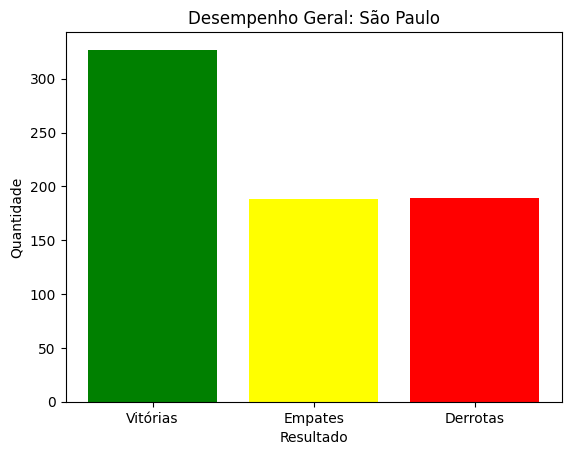

In [80]:
labels = ['Vitórias', 'Empates', 'Derrotas']
heights = [vitorias, empates, derrotas]

colors = ['green', 'yellow', 'red']
plt.bar(labels, heights, color=colors)

plt.title("Desempenho Geral: " + time)
plt.xlabel('Resultado')
plt.ylabel('Quantidade')

plt.show()

# Exibindo o time melhor e pior retrospecto em relação ao time selecionado

In [81]:
times_vitorias = {}
times_derrotas = {}

for jogo in jogos:
    if jogo.time_mandante == time:
        if jogo.time_vencedor == time:
            times_vitorias[jogo.time_visitante] = times_vitorias.get(jogo.time_visitante, 0) + 1
        else:
            times_derrotas[jogo.time_visitante] = times_derrotas.get(jogo.time_visitante, 0) + 1
    else:
        if jogo.time_vencedor == time:
            times_vitorias[jogo.time_mandante] = times_vitorias.get(jogo.time_mandante, 0) + 1
        else:
            times_derrotas[jogo.time_mandante] = times_derrotas.get(jogo.time_mandante, 0) + 1

times_mais_ganharam = sorted(times_vitorias, key=times_vitorias.get, reverse=True)[:5]
vitorias_mais_ganharam = [times_vitorias[time] for time in times_mais_ganharam]

times_mais_perderam = sorted(times_derrotas, key=times_derrotas.get, reverse=True)[:5]
derrotas_mais_perderam = [times_derrotas[time] for time in times_mais_perderam]


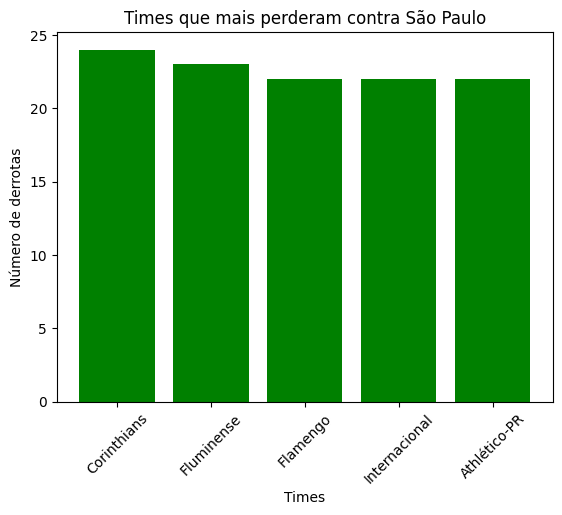

In [82]:
plt.bar(times_mais_perderam, derrotas_mais_perderam, color='green')
plt.title('Times que mais perderam contra ' + time)
plt.xlabel('Times')
plt.ylabel('Número de derrotas')
plt.xticks(rotation=45)
plt.show()

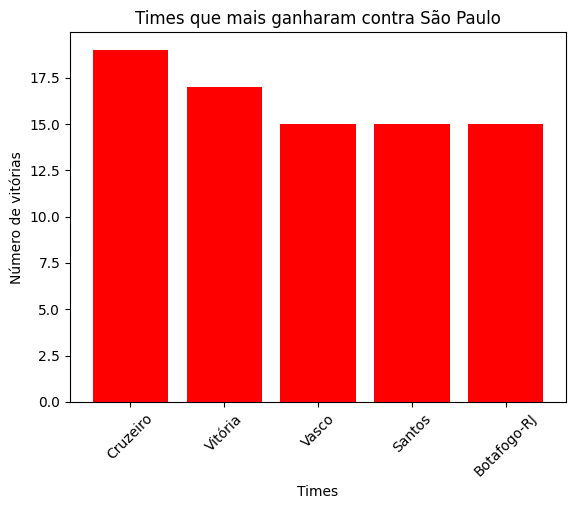

In [83]:
plt.bar(times_mais_ganharam, vitorias_mais_ganharam, color='red')
plt.title('Times que mais ganharam contra ' + time)
plt.xlabel('Times')
plt.ylabel('Número de vitórias')
plt.xticks(rotation=45)
plt.show()

# Obtendo o retrospecto do time dentro e fora de casa.

In [84]:
vitorias_mandante = 0
empates_mandante = 0
derrotas_mandante = 0

vitorias_visitante = 0
empates_visitante = 0
derrotas_visitante = 0

for jogo in jogos:
    if jogo.time_mandante == time:
      if jogo.time_vencedor == time:
        vitorias_mandante += 1
      elif jogo.time_vencedor == "-":
        empates_mandante += 1
      else:
        derrotas_mandante += 1
    else:
      if jogo.time_vencedor == time:
        vitorias_visitante += 1
      elif jogo.time_vencedor == "-":
        empates_visitante += 1
      else:
        derrotas_visitante += 1


porcentagem_vitorias = (vitorias_mandante / count_mandante) * 100
porcentagem_empates = (empates_mandante / count_mandante) * 100
porcentagem_derrotas = (derrotas_mandante / count_mandante) * 100

#
porcentagem_vitorias_visitante = (vitorias_visitante / count_visitante) * 100
porcentagem_empates_visitante = (empates_visitante / count_visitante) * 100
porcentagem_derrotas_visitante = (derrotas_visitante / count_visitante) * 100

print("Retrospecto:", time,"como mandante - V: {:.2f}% E: {:.2f}% D: {:.2f}%".format(porcentagem_vitorias, porcentagem_empates, porcentagem_derrotas))
print("Retrospecto:", time,"como visitante - V: {:.2f}% E: {:.2f}% D: {:.2f}%".format(porcentagem_vitorias_visitante, porcentagem_empates_visitante, porcentagem_derrotas_visitante))

Retrospecto: São Paulo como mandante - V: 58.52% E: 26.42% D: 15.06%
Retrospecto: São Paulo como visitante - V: 34.38% E: 26.99% D: 38.64%


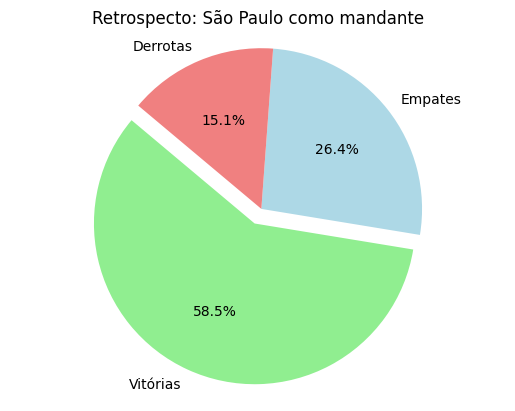

In [85]:
labels = ['Vitórias', 'Empates', 'Derrotas']

sizes = [porcentagem_vitorias, porcentagem_empates, porcentagem_derrotas]

colors = ['lightgreen', 'lightblue', 'lightcoral']

explode = (0.1, 0, 0)

# Criar o gráfico de pizza
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Adicionar título
plt.title("Retrospecto: "+ time +" como mandante")

# Mostrar o gráfico
plt.axis('equal')
plt.show()

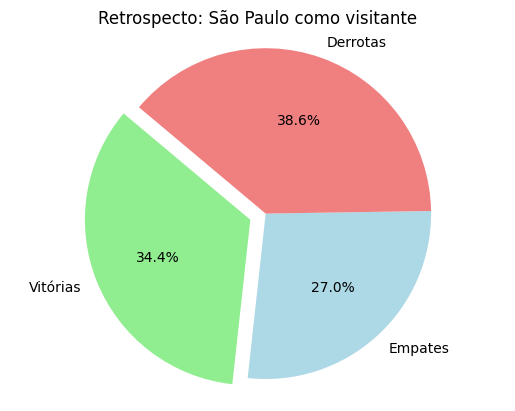

In [86]:
labels = ['Vitórias', 'Empates', 'Derrotas']

sizes = [porcentagem_vitorias_visitante, porcentagem_empates_visitante, porcentagem_derrotas_visitante]

colors = ['lightgreen', 'lightblue', 'lightcoral']

explode = (0.1, 0, 0)

# Criar o gráfico de pizza
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Adicionar título
plt.title("Retrospecto: "+ time+" como visitante")

# Mostrar o gráfico
plt.axis('equal')
plt.show()